In [1]:
# import sys, datetime
import serial.tools.list_ports
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
ports = serial.tools.list_ports.comports()
port = None
# print(ports)
for port in ports:
    # print(f"{port}")
    print(f"Порт: {port.device}")
    # print(f"Описание: {port.description}")
    # print(f"VID:PID: {port.vid}:{port.pid}")

if port:
    port = port.device

Порт: COM5


In [7]:
with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=11)) as serialData:
    # Read data from COM port
    command = 'R'

    # Send the command to the DataPort
    serialData.write(command.encode(encoding="utf-8"))
    # serialData.flush()
time.sleep(11)

In [8]:
line = None

with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=47)) as serialData:
    # Read data from COM port
    command = 'S'

    # Send the command to the DataPort
    serialData.write(command.encode())
    
    line = serialData.read(4194305)
    # line = serialData.read(30)
    # line = serialData.readline()
    # line = serialData.read_all()
    # line = serialData.read_until(',')
    # lines = serialData.readlines()

In [141]:
for symbol in line[len(line)-30:len(line)]:
    print(symbol)

65
17
65
17
66
17
66
17
66
17
66
17
66
17
66
17
66
17
66
17
67
17
67
17
67
17
67
17
67
17


In [ ]:
intline = []
for num in range(0, 2097152, 2):
    hi_byte = line[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = line[num+1]    
    intline.append(hi_byte*256+lo_byte)
# pd.DataFrame(intline)

In [51]:
%matplotlib qt5
plt.plot(intline)
len(intline)

1048576

In [11]:
encoder = []
for num in range(2097152, len(line)-1, 2):
    hi_byte = line[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = line[num+1]    
    encoder.append(hi_byte*256+lo_byte)
# pd.DataFrame(encoder)
# pd.DataFrame(encoder).tail(15)


In [50]:
%matplotlib qt5
plt.plot(encoder)

In [20]:
# df = pd.DataFrame({'encoder' : encoder, 'data' : intline})
# df.to_csv('data.csv')
df

,encoder,data
0,4022,-351
1,4022,-331
2,4022,-346
3,4023,-337
4,4023,-333
...,...,...
1048571,1337,-118
1048572,1337,-170
1048573,1337,-145
1048574,1338,-151


In [14]:
# Функция для удаления выбросов с помощью IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:

# Удаляем выбросы в столбце 'encoder'
df_clean = remove_outliers_iqr(df, 'encoder')

# Удаляем выбросы в столбце 'data'
df_clean = remove_outliers_iqr(df_clean, 'data')

# Сохраняем результат
df_clean

,encoder,data
0,4022,-351
1,4022,-331
2,4022,-346
3,4023,-337
4,4023,-333
...,...,...
1048571,1337,-118
1048572,1337,-170
1048573,1337,-145
1048574,1338,-151


encoder    102
data       102
dtype: int64

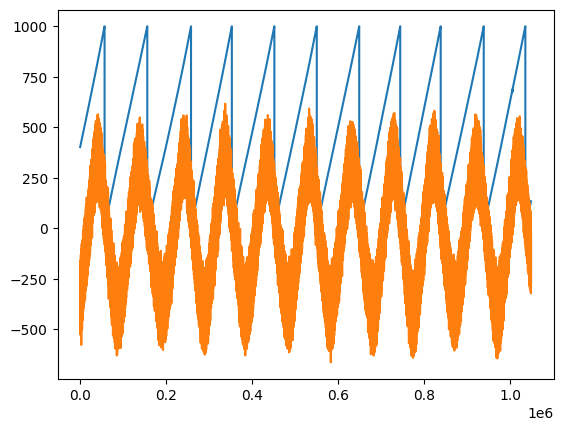

In [48]:
plt.plot(df_clean.encoder/10)
plt.plot(df_clean.data)
df_clean[df_clean.encoder == 9999].count()